Convolutional Constained MOD
============================

This example demonstrates the use of [ccmod.ConvCnstrMOD_Consensus](http://sporco.rtfd.org/en/latest/modules/sporco.admm.ccmod.html#sporco.admm.ccmod.ConvCnstrMOD_Consensus) for computing a convolutional dictionary update via the convolutional constrained method of optimal directions problem [[1]](http://sporco.rtfd.org/en/latest/zreferences.html#sorel-2016-fast) [[20]](http://sporco.rtfd.org/en/latest/zreferences.html#garcia-2018-convolutional1). This problem is mainly useful as a component within convolutional dictionary learning, but its use is demonstrated here since a user may wish to construct such objects as part of a custom convolutional dictionary learning algorithm, using [dictlrn.DictLearn](http://sporco.rtfd.org/en/latest/modules/sporco.dictlrn.dictlrn.html#sporco.dictlrn.dictlrn.DictLearn).

In [1]:
from __future__ import print_function
from builtins import input

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco.admm import cbpdn
from sporco.admm import ccmod
from sporco import util
from sporco import signal
from sporco import plot
plot.config_notebook_plotting()

Load training images.

In [2]:
exim = util.ExampleImages(scaled=True, zoom=0.25, gray=True)
S1 = exim.image('barbara.png', idxexp=np.s_[10:522, 100:612])
S2 = exim.image('kodim23.png', idxexp=np.s_[:, 60:572])
S3 = exim.image('monarch.png', idxexp=np.s_[:, 160:672])
S4 = exim.image('sail.png', idxexp=np.s_[:, 210:722])
S5 = exim.image('tulips.png', idxexp=np.s_[:, 30:542])
S = np.dstack((S1, S2, S3, S4, S5))

Highpass filter training images.

In [3]:
npd = 16
fltlmbd = 5
sl, sh = signal.tikhonov_filter(S, fltlmbd, npd)

Load initial dictionary.

In [4]:
D0 = util.convdicts()['G:12x12x36']

Compute sparse representation on current dictionary.

In [5]:
lmbda = 0.1
opt = cbpdn.ConvBPDN.Options({'Verbose': True, 'MaxMainIter': 100,
                     'HighMemSolve': True})
c = cbpdn.ConvBPDN(D0, sh, lmbda, opt)
X = c.solve()

Itn   Fnc       DFid      Regℓ1     r         s         ρ       
----------------------------------------------------------------


   0  4.25e+02  2.62e+01  3.99e+03  9.06e-01  1.98e-01  6.00e+00
   1  3.42e+02  7.40e+01  2.68e+03  5.95e-01  2.83e-01  6.00e+00


   2  3.10e+02  7.33e+01  2.37e+03  3.00e-01  2.50e-01  6.00e+00
   3  3.13e+02  6.71e+01  2.46e+03  2.24e-01  1.89e-01  4.65e+00


   4  3.22e+02  6.06e+01  2.61e+03  1.97e-01  1.31e-01  3.58e+00
   5  3.08e+02  5.83e+01  2.50e+03  1.71e-01  9.66e-02  3.10e+00


   6  2.81e+02  5.71e+01  2.24e+03  1.39e-01  7.93e-02  3.10e+00
   7  2.57e+02  5.71e+01  2.00e+03  1.14e-01  6.64e-02  3.10e+00


   8  2.42e+02  5.74e+01  1.84e+03  9.44e-02  5.48e-02  3.10e+00
   9  2.32e+02  5.78e+01  1.74e+03  7.89e-02  4.66e-02  3.10e+00


  10  2.25e+02  5.81e+01  1.67e+03  6.63e-02  4.09e-02  3.10e+00
  11  2.22e+02  5.83e+01  1.63e+03  6.02e-02  3.65e-02  2.79e+00


  12  2.20e+02  5.82e+01  1.62e+03  5.53e-02  3.24e-02  2.53e+00
  13  2.19e+02  5.80e+01  1.61e+03  4.84e-02  2.87e-02  2.53e+00


  14  2.17e+02  5.79e+01  1.59e+03  4.28e-02  2.57e-02  2.53e+00
  15  2.13e+02  5.78e+01  1.56e+03  3.81e-02  2.36e-02  2.53e+00


  16  2.10e+02  5.78e+01  1.52e+03  3.63e-02  2.18e-02  2.28e+00
  17  2.08e+02  5.78e+01  1.50e+03  3.47e-02  1.97e-02  2.08e+00


  18  2.06e+02  5.79e+01  1.48e+03  3.17e-02  1.78e-02  2.08e+00
  19  2.04e+02  5.80e+01  1.46e+03  2.91e-02  1.62e-02  2.08e+00


  20  2.03e+02  5.80e+01  1.45e+03  2.67e-02  1.50e-02  2.08e+00
  21  2.01e+02  5.80e+01  1.43e+03  2.46e-02  1.40e-02  2.08e+00


  22  2.00e+02  5.80e+01  1.42e+03  2.28e-02  1.30e-02  2.08e+00
  23  1.98e+02  5.80e+01  1.40e+03  2.12e-02  1.22e-02  2.08e+00


  24  1.97e+02  5.80e+01  1.39e+03  1.98e-02  1.15e-02  2.08e+00
  25  1.96e+02  5.81e+01  1.37e+03  1.85e-02  1.08e-02  2.08e+00


  26  1.94e+02  5.81e+01  1.36e+03  1.74e-02  1.02e-02  2.08e+00
  27  1.93e+02  5.81e+01  1.35e+03  1.63e-02  9.61e-03  2.08e+00


  28  1.92e+02  5.82e+01  1.34e+03  1.54e-02  9.11e-03  2.08e+00
  29  1.91e+02  5.82e+01  1.33e+03  1.45e-02  8.66e-03  2.08e+00


  30  1.90e+02  5.82e+01  1.32e+03  1.37e-02  8.22e-03  2.08e+00
  31  1.90e+02  5.83e+01  1.31e+03  1.30e-02  7.79e-03  2.08e+00


  32  1.89e+02  5.83e+01  1.31e+03  1.23e-02  7.38e-03  2.08e+00
  33  1.88e+02  5.83e+01  1.30e+03  1.17e-02  7.00e-03  2.08e+00


  34  1.88e+02  5.83e+01  1.30e+03  1.11e-02  6.66e-03  2.08e+00
  35  1.87e+02  5.83e+01  1.29e+03  1.06e-02  6.32e-03  2.08e+00


  36  1.87e+02  5.84e+01  1.28e+03  1.00e-02  6.01e-03  2.08e+00
  37  1.86e+02  5.84e+01  1.28e+03  9.56e-03  5.71e-03  2.08e+00


  38  1.86e+02  5.84e+01  1.27e+03  9.10e-03  5.45e-03  2.08e+00
  39  1.85e+02  5.84e+01  1.27e+03  8.66e-03  5.20e-03  2.08e+00


  40  1.85e+02  5.85e+01  1.26e+03  8.61e-03  4.96e-03  1.90e+00
  41  1.85e+02  5.85e+01  1.26e+03  8.26e-03  4.70e-03  1.90e+00


  42  1.84e+02  5.85e+01  1.26e+03  7.93e-03  4.42e-03  1.90e+00
  43  1.84e+02  5.85e+01  1.26e+03  7.59e-03  4.19e-03  1.90e+00


  44  1.84e+02  5.85e+01  1.25e+03  7.26e-03  3.98e-03  1.90e+00
  45  1.83e+02  5.85e+01  1.25e+03  6.95e-03  3.79e-03  1.90e+00


  46  1.83e+02  5.85e+01  1.25e+03  6.65e-03  3.61e-03  1.90e+00
  47  1.83e+02  5.85e+01  1.24e+03  6.36e-03  3.43e-03  1.90e+00


  48  1.82e+02  5.86e+01  1.24e+03  6.09e-03  3.28e-03  1.90e+00
  49  1.82e+02  5.86e+01  1.24e+03  5.82e-03  3.14e-03  1.90e+00


  50  1.82e+02  5.86e+01  1.23e+03  5.57e-03  3.01e-03  1.90e+00
  51  1.82e+02  5.86e+01  1.23e+03  5.33e-03  2.90e-03  1.90e+00


  52  1.81e+02  5.86e+01  1.23e+03  5.11e-03  2.78e-03  1.90e+00
  53  1.81e+02  5.86e+01  1.22e+03  4.89e-03  2.67e-03  1.90e+00


  54  1.81e+02  5.86e+01  1.22e+03  4.69e-03  2.56e-03  1.90e+00
  55  1.81e+02  5.86e+01  1.22e+03  4.50e-03  2.45e-03  1.90e+00


  56  1.80e+02  5.86e+01  1.22e+03  4.31e-03  2.35e-03  1.90e+00
  57  1.80e+02  5.86e+01  1.22e+03  4.14e-03  2.25e-03  1.90e+00


  58  1.80e+02  5.86e+01  1.21e+03  3.98e-03  2.16e-03  1.90e+00
  59  1.80e+02  5.86e+01  1.21e+03  3.83e-03  2.06e-03  1.90e+00


  60  1.80e+02  5.87e+01  1.21e+03  3.67e-03  1.98e-03  1.90e+00
  61  1.80e+02  5.87e+01  1.21e+03  3.53e-03  1.90e-03  1.90e+00


  62  1.79e+02  5.87e+01  1.21e+03  3.39e-03  1.84e-03  1.90e+00
  63  1.79e+02  5.87e+01  1.21e+03  3.26e-03  1.77e-03  1.90e+00


  64  1.79e+02  5.87e+01  1.20e+03  3.14e-03  1.70e-03  1.90e+00
  65  1.79e+02  5.87e+01  1.20e+03  3.02e-03  1.63e-03  1.90e+00


  66  1.79e+02  5.87e+01  1.20e+03  2.90e-03  1.56e-03  1.90e+00
  67  1.79e+02  5.87e+01  1.20e+03  2.79e-03  1.50e-03  1.90e+00


  68  1.79e+02  5.87e+01  1.20e+03  2.69e-03  1.45e-03  1.90e+00
  69  1.78e+02  5.87e+01  1.20e+03  2.58e-03  1.40e-03  1.90e+00


  70  1.78e+02  5.87e+01  1.20e+03  2.49e-03  1.35e-03  1.90e+00
  71  1.78e+02  5.87e+01  1.19e+03  2.40e-03  1.30e-03  1.90e+00


  72  1.78e+02  5.87e+01  1.19e+03  2.31e-03  1.25e-03  1.90e+00
  73  1.78e+02  5.87e+01  1.19e+03  2.22e-03  1.20e-03  1.90e+00


  74  1.78e+02  5.87e+01  1.19e+03  2.14e-03  1.16e-03  1.90e+00
  75  1.78e+02  5.87e+01  1.19e+03  2.07e-03  1.11e-03  1.90e+00


  76  1.78e+02  5.87e+01  1.19e+03  1.99e-03  1.07e-03  1.90e+00
  77  1.78e+02  5.87e+01  1.19e+03  1.92e-03  1.03e-03  1.90e+00


  78  1.77e+02  5.87e+01  1.19e+03  1.85e-03  9.91e-04  1.90e+00
  79  1.77e+02  5.87e+01  1.19e+03  1.78e-03  9.54e-04  1.90e+00


  80  1.77e+02  5.87e+01  1.19e+03  1.72e-03  9.17e-04  1.90e+00
  81  1.77e+02  5.87e+01  1.19e+03  1.66e-03  8.82e-04  1.90e+00


  82  1.77e+02  5.87e+01  1.18e+03  1.60e-03  8.48e-04  1.90e+00
  83  1.77e+02  5.87e+01  1.18e+03  1.54e-03  8.16e-04  1.90e+00


  84  1.77e+02  5.87e+01  1.18e+03  1.49e-03  7.86e-04  1.90e+00
  85  1.77e+02  5.87e+01  1.18e+03  1.43e-03  7.58e-04  1.90e+00


  86  1.77e+02  5.87e+01  1.18e+03  1.38e-03  7.33e-04  1.90e+00
  87  1.77e+02  5.88e+01  1.18e+03  1.34e-03  7.07e-04  1.90e+00


  88  1.77e+02  5.88e+01  1.18e+03  1.29e-03  6.83e-04  1.90e+00
  89  1.77e+02  5.88e+01  1.18e+03  1.24e-03  6.59e-04  1.90e+00


  90  1.77e+02  5.88e+01  1.18e+03  1.20e-03  6.37e-04  1.90e+00
  91  1.77e+02  5.88e+01  1.18e+03  1.16e-03  6.16e-04  1.90e+00


  92  1.77e+02  5.88e+01  1.18e+03  1.12e-03  5.95e-04  1.90e+00
  93  1.77e+02  5.88e+01  1.18e+03  1.08e-03  5.74e-04  1.90e+00


  94  1.77e+02  5.88e+01  1.18e+03  1.05e-03  5.54e-04  1.90e+00
  95  1.76e+02  5.88e+01  1.18e+03  1.01e-03  5.35e-04  1.90e+00


  96  1.76e+02  5.88e+01  1.18e+03  9.78e-04  5.16e-04  1.90e+00
----------------------------------------------------------------


Update dictionary for training image set.

In [6]:
opt = ccmod.ConvCnstrMOD_Consensus.Options({'Verbose': True,
            'MaxMainIter': 100, 'rho': 1e1})
c = ccmod.ConvCnstrMOD_Consensus(X, sh, D0.shape, opt)
c.solve()
D1 = c.getdict().squeeze()
print("ConvCnstrMOD_Consensus solve time: %.2fs" % c.timer.elapsed('solve'))

Itn   DFid      Cnstr     r         s       
--------------------------------------------


   0  5.83e+01  8.19e-07  9.62e-01  1.01e+00


   1  5.66e+01  5.28e-07  4.95e-01  2.51e-02
   2  5.18e+01  7.55e-07  7.64e-01  1.38e-01


   3  5.15e+01  7.43e-07  3.83e-01  3.02e-02
   4  5.10e+01  7.98e-07  4.89e-01  6.01e-02


   5  5.09e+01  6.60e-07  2.84e-01  2.16e-02


   6  5.08e+01  7.92e-07  3.13e-01  3.06e-02
   7  5.07e+01  7.62e-07  2.02e-01  1.58e-02


   8  5.07e+01  5.95e-07  2.00e-01  1.90e-02
   9  5.06e+01  7.28e-07  1.39e-01  1.18e-02


  10  5.06e+01  7.54e-07  1.28e-01  1.21e-02
  11  5.06e+01  7.02e-07  9.34e-02  8.06e-03


  12  5.06e+01  7.02e-07  8.21e-02  7.50e-03
  13  5.06e+01  8.12e-07  6.18e-02  5.38e-03


  14  5.06e+01  9.14e-07  5.25e-02  4.85e-03
  15  5.06e+01  9.83e-07  4.04e-02  3.73e-03


  16  5.06e+01  7.56e-07  3.36e-02  3.32e-03
  17  5.06e+01  8.65e-07  2.62e-02  2.66e-03


  18  5.06e+01  9.40e-07  2.15e-02  2.33e-03
  19  5.06e+01  9.65e-07  1.69e-02  1.91e-03


  20  5.06e+01  1.03e-06  1.38e-02  1.66e-03
  21  5.06e+01  8.34e-07  1.09e-02  1.38e-03


  22  5.06e+01  5.80e-07  8.81e-03  1.20e-03


  23  5.06e+01  8.76e-07  7.00e-03  1.02e-03
  24  5.06e+01  7.71e-07  5.64e-03  8.98e-04


  25  5.06e+01  1.02e-06  4.50e-03  7.81e-04
  26  5.06e+01  9.70e-07  3.61e-03  6.95e-04


  27  5.06e+01  9.58e-07  2.88e-03  6.18e-04
  28  5.06e+01  8.68e-07  2.31e-03  5.59e-04


  29  5.06e+01  7.61e-07  1.85e-03  5.07e-04
  30  5.06e+01  9.61e-07  1.48e-03  4.69e-04


  31  5.06e+01  7.32e-07  1.19e-03  4.35e-04
  32  5.06e+01  8.05e-07  9.52e-04  4.11e-04
--------------------------------------------
ConvCnstrMOD_Consensus solve time: 4.47s


Display initial and final dictionaries.

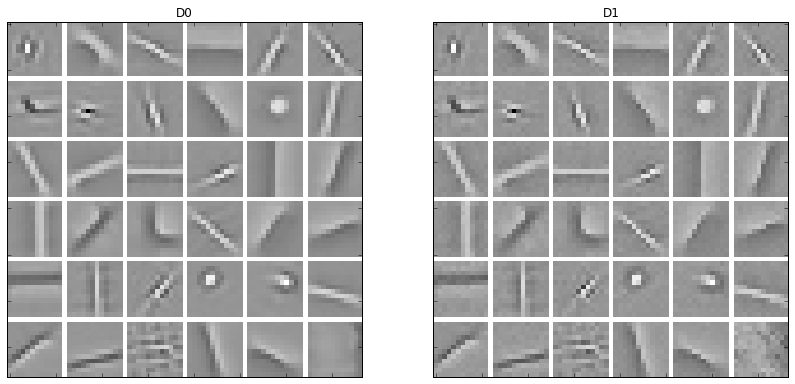

In [7]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), title='D0', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1), title='D1', fig=fig)
fig.show()

Get iterations statistics from CCMOD solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

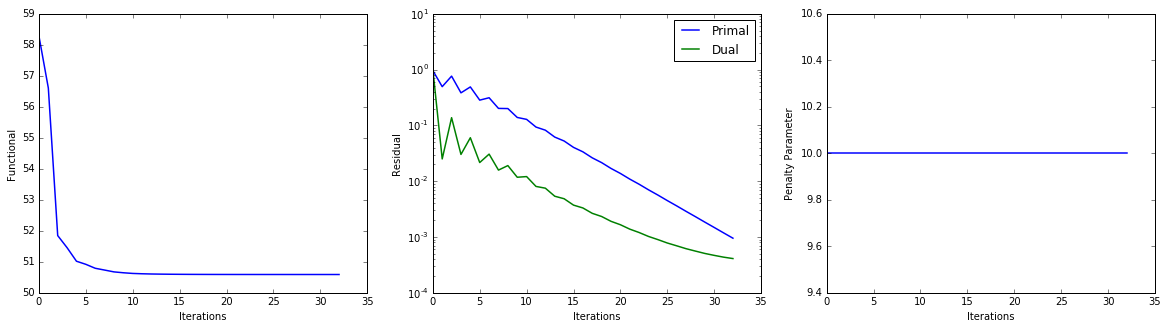

In [8]:
its = c.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.DFid, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()